<a href="https://colab.research.google.com/github/thejesht/machine_learning_projects/blob/main/Experiment2_Twitter_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries required for analysis 
import pandas as pd 
import numpy as np

In [2]:
#reading file containing candlesticks data pulled from binance exchange between time period 15-08-2019 to 15-08-2021 at a minute level for Bitcoin(BTC)
df1= pd.read_csv('Binance_data_BTCUSDT_15 Aug, 2019_to_15 Aug, 2021_1m.csv')

In [4]:
#exploring dimensions of imported dataset 
df1.shape

(1049773, 13)

In [5]:
#visualising dataset imported
df1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1565827200000,10055.16,10146.70,10050.48,10144.54,114.720030,1565827259999,1.157709e+06,1459,75.498611,7.620975e+05,0
1,1,1565827260000,10143.30,10234.08,10090.00,10132.25,409.414904,1565827319999,4.162714e+06,3443,201.309042,2.047813e+06,0
2,2,1565827320000,10143.17,10154.20,10112.25,10132.19,118.248972,1565827379999,1.198390e+06,1028,66.583217,6.748490e+05,0
3,3,1565827380000,10132.22,10149.83,10124.51,10149.31,36.480215,1565827439999,3.697902e+05,422,17.572211,1.781545e+05,0
4,4,1565827440000,10149.25,10150.00,10108.43,10128.26,84.651933,1565827499999,8.577344e+05,747,41.748784,4.230486e+05,0


In [7]:
#parametres returned by api response from binance exchange
#0-   Open Time 
#1 -  Open Price
#2 -  High Price
#3 -  Low Price
#4 -  Close Price
#5 -  Volume of trades
#6 -  Close Time
#7 -  Quote asset volume 
#8 -  Number of trades 
#9 -  Taker Buy Base Asset Volume 
#10 - Taker Buy Quote Asset Volume 
#11 - Ignore 

In [8]:
#we rename columns with names of the resective parameters 
df1.rename(columns={'0': 'Open_time', '1':'Open', '2':'High', '3':'Low', '4':'Close_BTC', '5':'Volume_BTC','6':'Close_time','7':'Quote asset volume','8':'Number_of_trades_BTC','9':'Taker buy base asset volume','10':'Taker buy quote asset volume','11': 'Ignore'}, inplace=True)
#we drop columns which are not required for further analysis, namely Open Price, High Price, Low Price, Quote Asset Volume, Taker Buy Base Asset Volume, Taker Buy Quote Asset Volume, Ignore 
df1.drop(columns=['Unnamed: 0','Open','High','Low','Close_time','Quote asset volume','Taker buy base asset volume','Taker buy quote asset volume','Ignore'], inplace=True)
#exploring dimensions of dataframe post dropping columns 
df1.shape

(1049773, 4)

In [9]:
#converting unixtime to readable time format
df1['Open_time'] = pd.to_datetime(df1['Open_time']/1000, unit='s')
#visualising dataset 
df1.head()

,Open_time,Close_BTC,Volume_BTC,Number_of_trades_BTC
0,2019-08-15 00:00:00,10144.54,114.720030,1459
1,2019-08-15 00:01:00,10132.25,409.414904,3443
2,2019-08-15 00:02:00,10132.19,118.248972,1028
3,2019-08-15 00:03:00,10149.31,36.480215,422
4,2019-08-15 00:04:00,10128.26,84.651933,747


In [10]:
#Renaming column Open_time to TimeStamp for ease of use 
df1.rename(columns={'Open_time': 'TimeStamp'}, inplace= True)
df1.head()

,TimeStamp,Close_BTC,Volume_BTC,Number_of_trades_BTC
0,2019-08-15 00:00:00,10144.54,114.720030,1459
1,2019-08-15 00:01:00,10132.25,409.414904,3443
2,2019-08-15 00:02:00,10132.19,118.248972,1028
3,2019-08-15 00:03:00,10149.31,36.480215,422
4,2019-08-15 00:04:00,10128.26,84.651933,747


In [11]:
#creation of new column named close_360 mins which represents the price of bitcoin(BTC) 6 hours prior to current time   
df1['close_360min'] = df1.Close_BTC.shift(360)
df1.head()

,TimeStamp,Close_BTC,Volume_BTC,Number_of_trades_BTC,close_360min
0,2019-08-15 00:00:00,10144.54,114.720030,1459,NaN
1,2019-08-15 00:01:00,10132.25,409.414904,3443,NaN
2,2019-08-15 00:02:00,10132.19,118.248972,1028,NaN
3,2019-08-15 00:03:00,10149.31,36.480215,422,NaN
4,2019-08-15 00:04:00,10128.26,84.651933,747,NaN


In [12]:
#type conversion of column Timestamp as a pandas time series element  
df1['TimeStamp'] =  pd.to_datetime(df1['TimeStamp'], format='%d/%m/%Y %H:%M')
df1.head()

,TimeStamp,Close_BTC,Volume_BTC,Number_of_trades_BTC,close_360min
0,2019-08-15 00:00:00,10144.54,114.720030,1459,NaN
1,2019-08-15 00:01:00,10132.25,409.414904,3443,NaN
2,2019-08-15 00:02:00,10132.19,118.248972,1028,NaN
3,2019-08-15 00:03:00,10149.31,36.480215,422,NaN
4,2019-08-15 00:04:00,10128.26,84.651933,747,NaN


In [13]:
#dropping row entries that contain null value. null values are created as we shift time stamp by 6 hours to determine lagged values 
df1.dropna(inplace=True)
df1.head()

,TimeStamp,Close_BTC,Volume_BTC,Number_of_trades_BTC,close_360min
360,2019-08-15 14:00:00,10034.93,32.579320,355,10144.54
361,2019-08-15 14:01:00,10063.10,34.863390,517,10132.25
362,2019-08-15 14:02:00,10065.28,83.969008,1088,10132.19
363,2019-08-15 14:03:00,10051.01,47.185592,519,10149.31
364,2019-08-15 14:04:00,10085.67,28.420858,328,10128.26


In [15]:
#creating a column named diff_360min which is indicative of price difference between current timestamp and 6 hours prior 
df1['diff_360min']= df1['close_360min'] - df1['Close_BTC']
df1.head()

,TimeStamp,Close_BTC,Volume_BTC,Number_of_trades_BTC,close_360min,diff_360min
360,2019-08-15 14:00:00,10034.93,32.579320,355,10144.54,109.61
361,2019-08-15 14:01:00,10063.10,34.863390,517,10132.25,69.15
362,2019-08-15 14:02:00,10065.28,83.969008,1088,10132.19,66.91
363,2019-08-15 14:03:00,10051.01,47.185592,519,10149.31,98.30
364,2019-08-15 14:04:00,10085.67,28.420858,328,10128.26,42.59


In [16]:
#we create a new column named indicator_360min which accounts for up/downswing in prices comparing present close price and close price 6 hours prior. Upswings are represented as '1' and downswings are represented as '0'  
df1['indicator_360min'] = np.where(df1['diff_360min'] > 0, 1, 0)
df1.head()

,TimeStamp,Close_BTC,Volume_BTC,Number_of_trades_BTC,close_360min,diff_360min,indicator_360min
360,2019-08-15 14:00:00,10034.93,32.579320,355,10144.54,109.61,1
361,2019-08-15 14:01:00,10063.10,34.863390,517,10132.25,69.15,1
362,2019-08-15 14:02:00,10065.28,83.969008,1088,10132.19,66.91,1
363,2019-08-15 14:03:00,10051.01,47.185592,519,10149.31,98.30,1
364,2019-08-15 14:04:00,10085.67,28.420858,328,10128.26,42.59,1


In [18]:
#value distribution of up/downsings
df1['indicator_360min'].value_counts()

0    545826
1    503587
Name: indicator_360min, dtype: int64

In [19]:
#we now filter items that are required for further analysis 
df1 = df1.filter(items=['TimeStamp', 'Close_BTC','indicator_360min'])
df1.head()

,TimeStamp,Close_BTC,indicator_360min
360,2019-08-15 14:00:00,10034.93,1
361,2019-08-15 14:01:00,10063.10,1
362,2019-08-15 14:02:00,10065.28,1
363,2019-08-15 14:03:00,10051.01,1
364,2019-08-15 14:04:00,10085.67,1


In [20]:
#importing dataset containing tweets scrapped from cryptomarket influencers acquired using automated webscrapper built 
df2= pd.read_csv('20210815_btc_tweets.csv')
#visualising dataset acquired
df2.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1413396249546563586,1413355442475085825,2021-07-09 08:15:00 GMT Daylight Time,2021-07-09,08:15:00,100,44196397,elonmusk,Elon Musk,NaN,@MattWallace888 BTC &amp; ETH are pursuing a m...,en,[],[],[],7005,6712,27392,[],[],https://twitter.com/elonmusk/status/1413396249...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MattWallace888', 'name': 'Ma...",NaN,NaN,NaN,NaN
1,1404132183254523905,1404045922674302982,2021-06-13 18:42:54 GMT Daylight Time,2021-06-13,18:42:54,100,44196397,elonmusk,Elon Musk,NaN,@Cointelegraph This is inaccurate. Tesla only ...,en,[],[],[],10126,10893,54738,[],[],https://twitter.com/elonmusk/status/1404132183...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Cointelegraph', 'name': 'Coi...",NaN,NaN,NaN,NaN
2,1401091921746006017,1400560049358094340,2021-06-05 09:21:59 GMT Daylight Time,2021-06-05,09:21:59,100,44196397,elonmusk,Elon Musk,NaN,@lexfridman @VitalikButerin @ethereum @Bitcoin...,en,[],[],[],2065,3309,24705,[],[],https://twitter.com/elonmusk/status/1401091921...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'lexfridman', 'name': 'Lex Fr...",NaN,NaN,NaN,NaN
3,1397626694609956864,1397625459437826049,2021-05-26 19:52:25 GMT Daylight Time,2021-05-26,19:52:25,100,44196397,elonmusk,Elon Musk,NaN,@BTC_Archive 🤣🤣,und,[],[],[],921,330,8609,[],[],https://twitter.com/elonmusk/status/1397626694...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BTC_Archive', 'name': 'Bitco...",NaN,NaN,NaN,NaN
4,1394170030741413888,1394051036462071808,2021-05-17 06:56:52 GMT Daylight Time,2021-05-17,06:56:52,100,44196397,elonmusk,Elon Musk,NaN,"@BTC_Archive To clarify speculation, Tesla has...",en,[],[],[],18117,17855,101526,[],[],https://twitter.com/elonmusk/status/1394170030...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BTC_Archive', 'name': 'Bitco...",NaN,NaN,NaN,NaN


In [21]:
#filtering items that are required for further analysis 
df2= df2.filter(items=['date','time','tweet'])
df2.head()

,date,time,tweet
0,2021-07-09,08:15:00,@MattWallace888 BTC &amp; ETH are pursuing a m...
1,2021-06-13,18:42:54,@Cointelegraph This is inaccurate. Tesla only ...
2,2021-06-05,09:21:59,@lexfridman @VitalikButerin @ethereum @Bitcoin...
3,2021-05-26,19:52:25,@BTC_Archive 🤣🤣
4,2021-05-17,06:56:52,"@BTC_Archive To clarify speculation, Tesla has..."


In [22]:
#creating metric timestamp which can be indexed with numerical dataset created above for our study 
df2['TimeStamp'] = pd.to_datetime(df2['date'].apply(str)+' '+df2['time'])
df2.drop(columns=['date', 'time'], inplace= True)
df2.head()

,tweet,TimeStamp
0,@MattWallace888 BTC &amp; ETH are pursuing a m...,2021-07-09 08:15:00
1,@Cointelegraph This is inaccurate. Tesla only ...,2021-06-13 18:42:54
2,@lexfridman @VitalikButerin @ethereum @Bitcoin...,2021-06-05 09:21:59
3,@BTC_Archive 🤣🤣,2021-05-26 19:52:25
4,"@BTC_Archive To clarify speculation, Tesla has...",2021-05-17 06:56:52


In [23]:
#creating column pre_clean_len which represents length of tweets prior acquired by web scrapper
df2['pre_clean_len'] = [len(t) for t in df2.tweet]
df2.head()

,tweet,TimeStamp,pre_clean_len
0,@MattWallace888 BTC &amp; ETH are pursuing a m...,2021-07-09 08:15:00,303
1,@Cointelegraph This is inaccurate. Tesla only ...,2021-06-13 18:42:54,286
2,@lexfridman @VitalikButerin @ethereum @Bitcoin...,2021-06-05 09:21:59,148
3,@BTC_Archive 🤣🤣,2021-05-26 19:52:25,15
4,"@BTC_Archive To clarify speculation, Tesla has...",2021-05-17 06:56:52,67


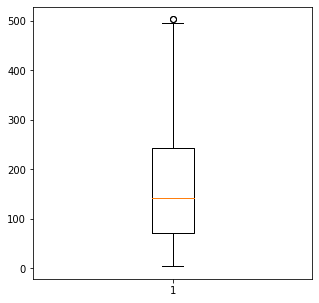

In [24]:
#visualising value distribution under column pre_clean_len, to determine if it is required to perform data wrangling of acquired tweet data 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df2.pre_clean_len)
plt.show()

In [26]:
#it is worth noting that twitter platform allows only 280 charecters to be present in the tweet, however in dataset we had imported we find close to 12% of entries that contain more than 280 charecters. Hence it is required we perform data wrangling to remove unwanted information.
x= df2[df2.pre_clean_len > 280]
len(x)/len(df2)

0.11970610660566992

In [27]:
#data wrangling function to remove unwanted information from acquired tweets 
plt.style.use('fivethirtyeight')
%matplotlib inline
#importing required libraries 
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
#initilising tokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

#tasks performed by function listed as follows:
#remove HTML decoing 
#remove @mentions
#remove URL links specified in tweets 
#remove UTF-8 BOM(Byte Order Mark)
#remove hastags and numbers specified in tweets
#remove numbers and special charecters
#convert upper case to lower case charecters 
#we have defined dictionary above that contain negation words, so that remove of special charecters from tweets - we do not end up loosing text value
#tokenising text post cleaning tweet data and joing them to preserve value  

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()


In [28]:
#applying tweet_cleaner on to scrapped tweet data for data wrangling
df2['tweet'] = df2['tweet'].apply(lambda text: tweet_cleaner(text))
df2.head() 

,tweet,TimeStamp,pre_clean_len
0,btc eth are pursuing multilayer transaction sy...,2021-07-09 08:15:00,303
1,this is inaccurate tesla only sold of holdings...,2021-06-13 18:42:54,286
2,pretty much agree with vitalik,2021-06-05 09:21:59,148
3,,2021-05-26 19:52:25,15
4,to clarify speculation tesla has not sold any ...,2021-05-17 06:56:52,67


In [29]:
#creating column post_clean_len to determine length of tweets post data wrangling 
df2['post_clean_len'] = [len(t) for t in df2.tweet]
df2.head()

,tweet,TimeStamp,pre_clean_len,post_clean_len
0,btc eth are pursuing multilayer transaction sy...,2021-07-09 08:15:00,303,263
1,this is inaccurate tesla only sold of holdings...,2021-06-13 18:42:54,286,252
2,pretty much agree with vitalik,2021-06-05 09:21:59,148,30
3,,2021-05-26 19:52:25,15,0
4,to clarify speculation tesla has not sold any ...,2021-05-17 06:56:52,67,53


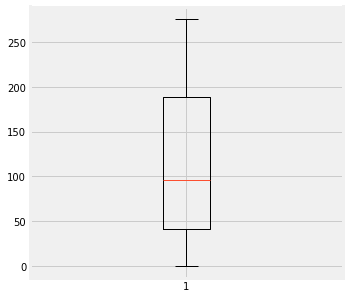

In [30]:
#visualising distribution of values post cleaning acquired tweets  
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df2.post_clean_len)
plt.show()

In [33]:
#it is worth noting that post cleaning acquired twitter data, we now find that the length of tweets are restricted to maximum value of 276, which is less than maximum charecters allowed by twitter platform to be present in a tweet  

In [34]:
#exploring dimensions of tweet dataset acquired 
df2.shape

(28854, 4)

In [35]:
#since we have acquired candlesticks data from Binance at a minute level, we remove seconds element from timestamp in tweet dataset for indexing 
df2.TimeStamp = df2.TimeStamp.map(lambda x: x.replace(second=0))
df2.head()  

,tweet,TimeStamp,pre_clean_len,post_clean_len
0,btc eth are pursuing multilayer transaction sy...,2021-07-09 08:15:00,303,263
1,this is inaccurate tesla only sold of holdings...,2021-06-13 18:42:00,286,252
2,pretty much agree with vitalik,2021-06-05 09:21:00,148,30
3,,2021-05-26 19:52:00,15,0
4,to clarify speculation tesla has not sold any ...,2021-05-17 06:56:00,67,53


In [36]:
#exploring no of unique entries present in tweet dataset 
df2['TimeStamp'].nunique()

27547

In [37]:
#dropping columns pre_clean_len and post_clean_len as they are not required for further analysis 
df2.drop(columns=['pre_clean_len', 'post_clean_len'], inplace=True)
df2.head()

,tweet,TimeStamp
0,btc eth are pursuing multilayer transaction sy...,2021-07-09 08:15:00
1,this is inaccurate tesla only sold of holdings...,2021-06-13 18:42:00
2,pretty much agree with vitalik,2021-06-05 09:21:00
3,,2021-05-26 19:52:00
4,to clarify speculation tesla has not sold any ...,2021-05-17 06:56:00


In [38]:
#we now aggregate tweets at a minute level for further analysis 
df2=df2.resample('min', on='TimeStamp').agg({'tweet':'sum' })
df2.shape 

(852840, 1)

In [39]:
#post aggregation of tweets at a minute level, we now remove entries that contain null entries 
df2 = df2.loc[df2['tweet'] != 0]
df2.shape

(27547, 1)

In [40]:
#we reset index of tweet dataset to timestamp to merge with numerical dataset created above  
df2.reset_index(level=0, inplace=True)
df2.head()

,TimeStamp,tweet
0,2020-01-01 08:32:00,almost as useless as your tweet about btc bein...
1,2020-01-01 11:30:00,in the reports account for it as the value of ...
2,2020-01-01 14:51:00,good eye yes used the original formula btc sf ...
3,2020-01-01 15:29:00,that great congrats gaurav are you able to set...
4,2020-01-01 22:09:00,no because it has not established oscillation ...


In [41]:
#we now merge tweet dataset along with numerical dataset created above to create our final dataset which can then be used for our analysis 
df = pd.merge(df2, df1, how='inner', on='TimeStamp')
df.shape

(27480, 4)

In [42]:
#visualising dataset created for analysis 
df.head()

,TimeStamp,tweet,Close_BTC,indicator_360min
0,2020-01-01 08:32:00,almost as useless as your tweet about btc bein...,7190.57,1
1,2020-01-01 11:30:00,in the reports account for it as the value of ...,7231.05,0
2,2020-01-01 14:51:00,good eye yes used the original formula btc sf ...,7221.50,0
3,2020-01-01 15:29:00,that great congrats gaurav are you able to set...,7228.13,0
4,2020-01-01 22:09:00,no because it has not established oscillation ...,7219.85,1


In [43]:
df.tail()

,TimeStamp,tweet,Close_BTC,indicator_360min
27475,2021-08-14 21:10:00,btc usd update am not going to try and call th...,46722.22,1
27476,2021-08-14 22:02:00,the btc retest is still in progress the retest...,46978.00,0
27477,2021-08-14 23:03:00,altcoin market cap is still well positioned fo...,46865.44,0
27478,2021-08-14 23:39:00,the way alts shrugged off that btc nuke last n...,47107.74,0
27479,2021-08-14 23:57:00,btc took the highs then barted down within the...,47041.95,0


In [44]:
#we notice that we have collated tweet data from twitter between time period: 01-01-2020 to 14-08-2020. note: the stratgey used to scrape tweets include collections of tweets from 51 influencer handles with a limit of 1000 tweets per user containing string "#btc"

In [45]:
#checking for null value in dataset created for analysis 
df.isnull().sum()

TimeStamp           0
tweet               0
Close_BTC           0
indicator_360min    0
dtype: int64

In [46]:
df['indicator_360min'].value_counts()

0    15273
1    12207
Name: indicator_360min, dtype: int64

In [47]:
#by exploring value distribution of dependent variable indicator_360min, that our dataset does not contain imbalance 

In [48]:
#we now filter columns whch are required for further analysis 
df=df[['TimeStamp','tweet','indicator_360min']]
df.head()

,TimeStamp,tweet,indicator_360min
0,2020-01-01 08:32:00,almost as useless as your tweet about btc bein...,1
1,2020-01-01 11:30:00,in the reports account for it as the value of ...,0
2,2020-01-01 14:51:00,good eye yes used the original formula btc sf ...,0
3,2020-01-01 15:29:00,that great congrats gaurav are you able to set...,0
4,2020-01-01 22:09:00,no because it has not established oscillation ...,1


In [50]:
#saving dataset 
df.to_csv('sent_influencer_360.csv')

In [51]:
#resetting index of dataframe to timestamp
df.set_index('TimeStamp', inplace=True)
df.head()

,tweet,indicator_360min
TimeStamp,,
2020-01-01 08:32:00,almost as useless as your tweet about btc bein...,1
2020-01-01 11:30:00,in the reports account for it as the value of ...,0
2020-01-01 14:51:00,good eye yes used the original formula btc sf ...,0
2020-01-01 15:29:00,that great congrats gaurav are you able to set...,0
2020-01-01 22:09:00,no because it has not established oscillation ...,1


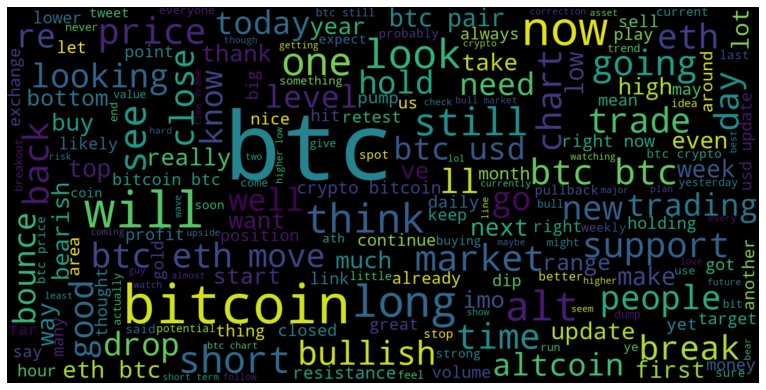

In [53]:
#creating a worldcloud to visualise tweets representing a positive upswing in price of bitcoin
from wordcloud import WordCloud
pos_tweets = df[df.indicator_360min == 1]
pos_string = []
for t in pos_tweets.tweet:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

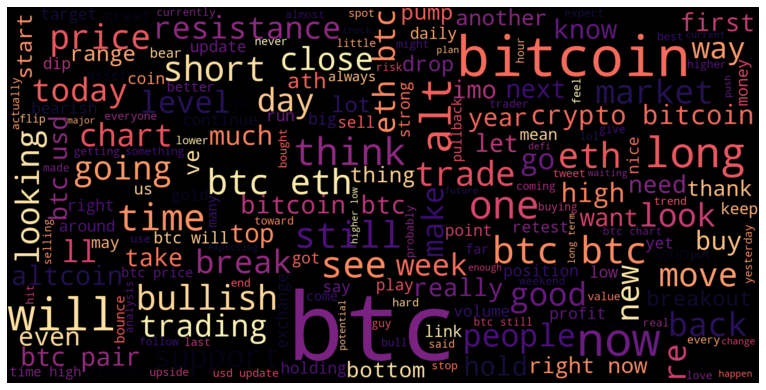

In [55]:
#creating a worldcloud to visualise tweets representing a negative downswing in price of bitcoin
neg_tweets = df[df.indicator_360min == 0]
neg_string = []
for t in neg_tweets.tweet:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
#exploring most used words in influencer tweets
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df.tweet)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [57]:
#exploring no of unique words in dataset collected 
len(cvec.get_feature_names())

16842

In [58]:
# creating a dataset containing most used words from twitter daat collected 
neg_doc_matrix = cvec.transform(df[df.indicator_360min == 0].tweet)
pos_doc_matrix = cvec.transform(df[df.indicator_360min == 1].tweet)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
aa,1,0
aaaaaaaaaaaaaaaaaaaethereum,0,1
aaaaaaaaahahahahahha,1,0
aaaaand,0,1
aaaand,0,1


In [59]:
#sorting values in dataset, to understand most used words by influencers during bitcoin price fluctuations 
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
btc,15825,12457,28282
the,12542,10432,22974
to,9220,7713,16933
and,6167,5080,11247
is,5844,4624,10468
it,4810,3877,8687
in,4493,3782,8275
of,4564,3695,8259
for,4491,3735,8226
on,4335,3654,7989


In [60]:
#saving dataset
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

Text(0.5, 1.0, 'Top 500 tokens in tweets')

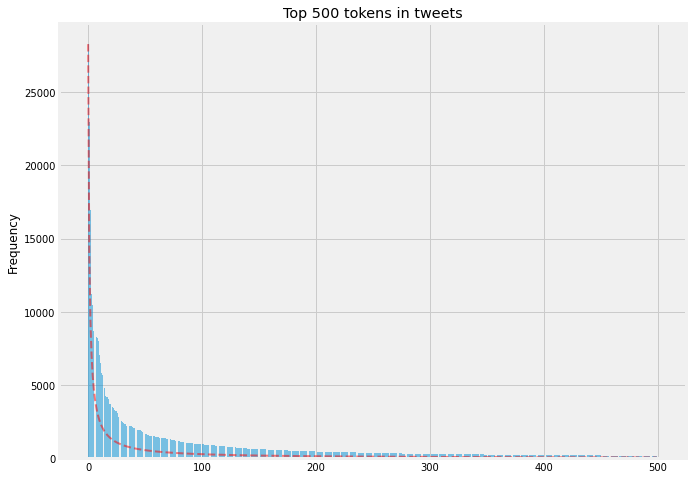

In [61]:
#visualising distribution of top 500 tokens within tweets collected 
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

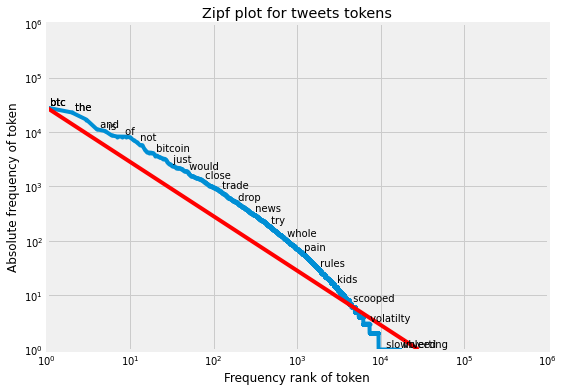

In [62]:
#visualising token distribution to verify if they follow zipfs law
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [63]:
#above visualisation is indicative that tokens from collected tweets follow a near zipfian distribution 

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

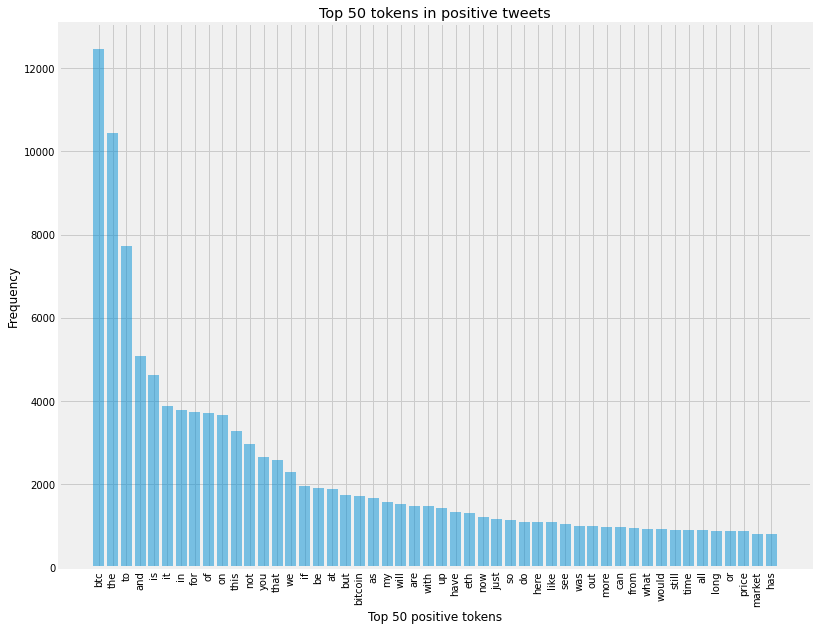

In [64]:
#visualising top 50 tokens from tweets that have posted during upswing  
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

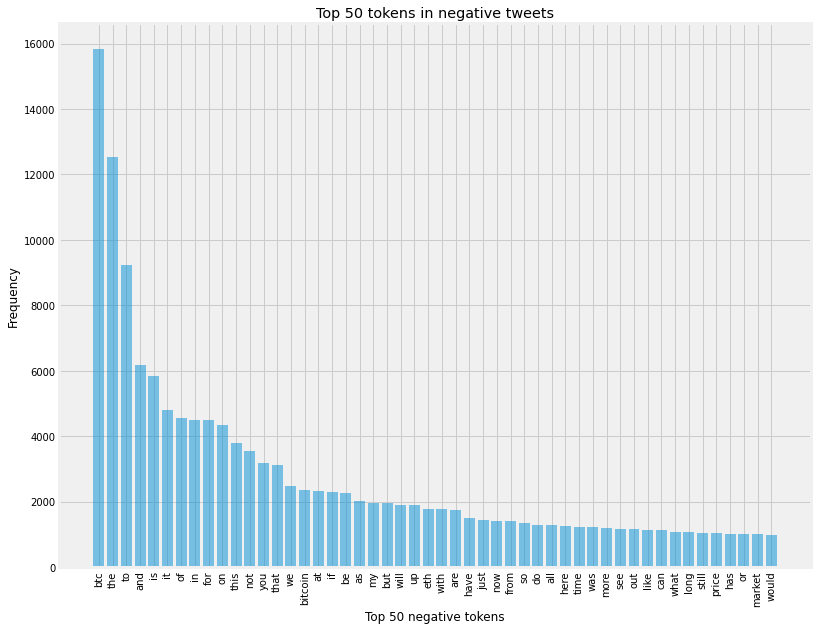

In [65]:
#visualising top 50 tokens from tweets that have been posted during downswing 
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

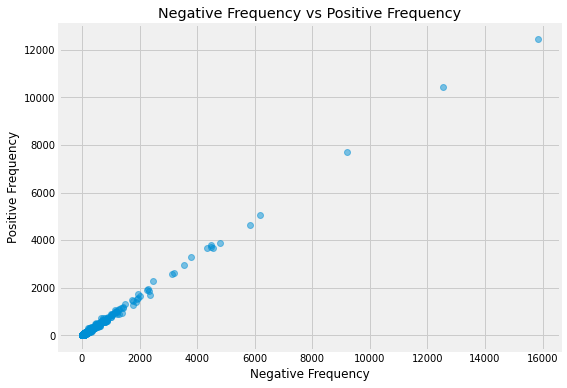

In [66]:
#visualising distribution of tokens between tweets posted during up/downswings 

import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [67]:
#post visualising tweet data collected, we now move on to modelling
x = df.tweet
y = df.indicator_360min

In [68]:
#importing required libraries to create train test and validation dataset 
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [69]:
# we create train, validation and test set of ratio 0.8,0.1,0.1
SEED = 42
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [70]:
#post creating train test and validation set for analysis, we explore the distribution of dependent variable
print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print ("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print ("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 21984 entries with 55.28% negative, 44.72% positive
Validation set has total 2748 entries with 56.51% negative, 43.49% positive
Test set has total 2748 entries with 57.06% negative, 42.94% positive


In [71]:
#importing libraries to classify tweets by sentiment 
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
#we check for polarity in tweets using snetiment analysis library textblob, to check if polarity in tweets can be used to determine up/down swings 
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

In [73]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])
print ("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print ("-"*80)
print ("Confusion Matrix\n")
print (confusion)
print ("-"*80)
print ("Classification Report\n")
print (classification_report(y_validation, tbpred))

Accuracy Score: 45.41%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                1008                 187
negative                1313                 240
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.56      0.15      0.24      1553
           1       0.43      0.84      0.57      1195

    accuracy                           0.45      2748
   macro avg       0.50      0.50      0.41      2748
weighted avg       0.51      0.45      0.39      2748



In [75]:
#with the above resuls, we understand that sentiment of tweets from influencers are largely positive regardless of price fluctuations and only polrity metric cannot be used in effective predictions of fluctuations

In [76]:
#importing libraries for modelling using logistic regression 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [77]:
#creating a fucntion that provides accuracy metrics 
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [78]:
#modelling using bag of words approach 
#since the maximum no of unique tokens in our dataset is 16842, we loop a feature map between 1000,15000 tokens to identify effective hyper parameters for modelling   
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,15000,2000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [79]:
#bag of words approach - with features that only consist unigram, post removal of stop words
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 1000 features
null accuracy: 56.51%
accuracy score: 55.13%
model is 1.38% less accurate than null accuracy
train and test time: 0.87s
--------------------------------------------------------------------------------
Validation result for 3000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.71%
model is 2.80% less accurate than null accuracy
train and test time: 0.96s
--------------------------------------------------------------------------------
Validation result for 5000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.51%
model is 2.00% less accurate than null accuracy
train and test time: 0.96s
--------------------------------------------------------------------------------
Validation result for 7000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.29%
model is 2.22% less accurate than null accuracy
train and test time: 1.00s
--------------------------------------------------------------------------------
Validation result for 9000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.33%
model is 2.18% less accurate than null accuracy
train and test time: 0.98s
--------------------------------------------------------------------------------
Validation result for 11000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.33%
model is 2.18% less accurate than null accuracy
train and test time: 1.59s
--------------------------------------------------------------------------------
Validation result for 13000 features
null accuracy: 56.51%
accuracy score: 54.29%
model is 2.22% less accurate than null accuracy
train and test time: 1.64s
--------------------------------------------------------------------------------
CPU times: user 7.55 s, sys: 2.64 s, total: 10.2 s
Wall time: 8.04 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [80]:
#bag of words approach - with features that only consist unigram
%%time
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 1000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.82%
model is 0.69% less accurate than null accuracy
train and test time: 1.03s
--------------------------------------------------------------------------------
Validation result for 3000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.20%
model is 1.31% less accurate than null accuracy
train and test time: 1.06s
--------------------------------------------------------------------------------
Validation result for 5000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.77%
model is 1.75% less accurate than null accuracy
train and test time: 1.10s
--------------------------------------------------------------------------------
Validation result for 7000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.26%
model is 2.26% less accurate than null accuracy
train and test time: 1.12s
--------------------------------------------------------------------------------
Validation result for 9000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.40%
model is 2.11% less accurate than null accuracy
train and test time: 1.17s
--------------------------------------------------------------------------------
Validation result for 11000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.91%
model is 1.60% less accurate than null accuracy
train and test time: 1.83s
--------------------------------------------------------------------------------
Validation result for 13000 features
null accuracy: 56.51%
accuracy score: 55.17%
model is 1.35% less accurate than null accuracy
train and test time: 1.79s
--------------------------------------------------------------------------------
CPU times: user 8.69 s, sys: 2.89 s, total: 11.6 s
Wall time: 9.13 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [81]:
#since we do not achieve expected accuracy with/ without removing stop words, features consisting of unigrams. we now only remove custom stop words to evaluate if the same can help improve upon accuracy 
csv = 'term_freq_df.csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.sort_values(by='total', ascending=False).iloc[:15]

,negative,positive,total
btc,15825,12457,28282
the,12542,10432,22974
to,9220,7713,16933
and,6167,5080,11247
is,5844,4624,10468
it,4810,3877,8687
in,4493,3782,8275
of,4564,3695,8259
for,4491,3735,8226
on,4335,3654,7989


In [82]:
#custom stop words - consist of top 14 stop words from dataset 
from sklearn.feature_extraction import text

a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[1:15].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

True

In [83]:
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[1:15].index))

In [84]:
#bag of words approach post removing custom stop words from dataset
%%time
print ("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 15 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 15 frequent words)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 1000 features
null accuracy: 56.51%
accuracy score: 55.57%
model is 0.95% less accurate than null accuracy
train and test time: 0.96s
--------------------------------------------------------------------------------
Validation result for 3000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.73%
model is 1.78% less accurate than null accuracy
train and test time: 1.06s
--------------------------------------------------------------------------------
Validation result for 5000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.09%
model is 1.42% less accurate than null accuracy
train and test time: 1.07s
--------------------------------------------------------------------------------
Validation result for 7000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.06%
model is 1.46% less accurate than null accuracy
train and test time: 1.08s
--------------------------------------------------------------------------------
Validation result for 9000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.06%
model is 1.46% less accurate than null accuracy
train and test time: 1.14s
--------------------------------------------------------------------------------
Validation result for 11000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.95%
model is 1.56% less accurate than null accuracy
train and test time: 1.64s
--------------------------------------------------------------------------------
Validation result for 13000 features
null accuracy: 56.51%
accuracy score: 55.13%
model is 1.38% less accurate than null accuracy
train and test time: 1.62s
--------------------------------------------------------------------------------
CPU times: user 8.46 s, sys: 2.25 s, total: 10.7 s
Wall time: 8.6 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


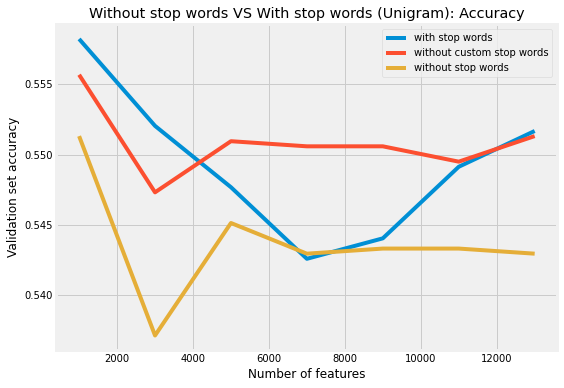

In [85]:
#plotting results of our experiments below
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [86]:
# we observe using bag of words approach, we attain maximum accuracy with features that contain stop words while considering unigrams as tokens for analysis 

In [87]:
#bag of words approach using bigram, without removal of stop words 
%%time
print ("RESULT FOR BIGRAM WITHOUT STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 1000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.31%
model is 1.20% less accurate than null accuracy
train and test time: 2.45s
--------------------------------------------------------------------------------
Validation result for 3000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.60%
model is 2.91% less accurate than null accuracy
train and test time: 2.50s
--------------------------------------------------------------------------------
Validation result for 5000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.20%
model is 3.31% less accurate than null accuracy
train and test time: 2.57s
--------------------------------------------------------------------------------
Validation result for 7000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.71%
model is 2.80% less accurate than null accuracy
train and test time: 2.58s
--------------------------------------------------------------------------------
Validation result for 9000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.31%
model is 3.20% less accurate than null accuracy
train and test time: 2.63s
--------------------------------------------------------------------------------
Validation result for 11000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.57%
model is 2.95% less accurate than null accuracy
train and test time: 3.20s
--------------------------------------------------------------------------------
Validation result for 13000 features
null accuracy: 56.51%
accuracy score: 53.97%
model is 2.55% less accurate than null accuracy
train and test time: 3.17s
--------------------------------------------------------------------------------
CPU times: user 18.7 s, sys: 2.78 s, total: 21.5 s
Wall time: 19.1 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [88]:
#bag of words approach using trigram, without removal of stop words
%%time
print ("RESULT FOR TRIGRAM WITHOUT STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR TRIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 1000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.35%
model is 1.16% less accurate than null accuracy
train and test time: 4.66s
--------------------------------------------------------------------------------
Validation result for 3000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.60%
model is 2.91% less accurate than null accuracy
train and test time: 4.73s
--------------------------------------------------------------------------------
Validation result for 5000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.71%
model is 2.80% less accurate than null accuracy
train and test time: 4.73s
--------------------------------------------------------------------------------
Validation result for 7000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.42%
model is 3.09% less accurate than null accuracy
train and test time: 4.74s
--------------------------------------------------------------------------------
Validation result for 9000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.28%
model is 3.24% less accurate than null accuracy
train and test time: 4.82s
--------------------------------------------------------------------------------
Validation result for 11000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.17%
model is 3.35% less accurate than null accuracy
train and test time: 5.41s
--------------------------------------------------------------------------------
Validation result for 13000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 53.31%
model is 3.20% less accurate than null accuracy
train and test time: 5.63s
--------------------------------------------------------------------------------
CPU times: user 34.1 s, sys: 3.4 s, total: 37.5 s
Wall time: 34.8 s


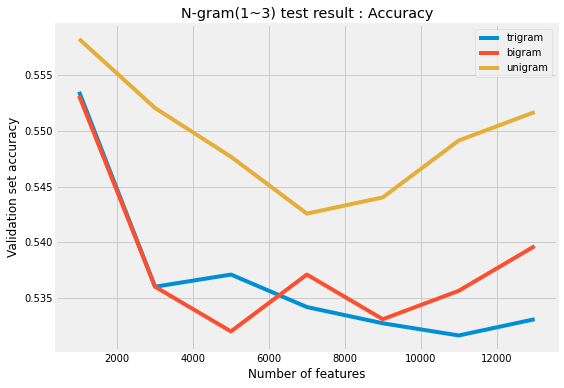

In [89]:
#plotting resuls of our analysis using unigram, bi and tri-gram metrics
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [90]:
#we observe unigram with stop words provide us with the best accracy, if we were to use bag of words approach. However the accuracy of the model built is low

In [91]:
#function to evaluate accuracy of model 
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("-"*80)
    print ("Confusion Matrix\n")
    print (confusion)
    print ("-"*80)
    print ("Classification Report\n")
    print (classification_report(y_test, y_pred, target_names=['negative','positive']))

In [93]:
#building a logistic regression model using best hyper parameter acquired from our analysis 
%%time
ug_cvec = CountVectorizer(max_features=1000)
ug_pipeline = Pipeline([
        ('vectorizer', ug_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(ug_pipeline, x_train, y_train, x_validation, y_validation)

null accuracy: 56.51%
accuracy score: 55.82%
model is 0.69% less accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                1163                 390
positive                 824                 371
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.59      0.75      0.66      1553
    positive       0.49      0.31      0.38      1195

    accuracy                           0.56      2748
   macro avg       0.54      0.53      0.52      2748
weighted avg       0.54      0.56      0.54      2748

CPU times: user 1.09 s, sys: 3.2 ms, total: 1.09 s
Wall time: 1.09 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [96]:
#TF-IDF Approach
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [98]:
#creating features using tfidf vectorizer inclusive of stop words, unigrams
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 1000 features
null accuracy: 56.51%
accuracy score: 56.37%
model is 0.15% less accurate than null accuracy
train and test time: 1.04s
--------------------------------------------------------------------------------
Validation result for 3000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.99%
model is 1.53% less accurate than null accuracy
train and test time: 1.08s
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 56.51%
accuracy score: 55.17%
model is 1.35% less accurate than null accuracy
train and test time: 1.06s
--------------------------------------------------------------------------------
Validation result for 7000 features
null accuracy: 56.51%
accuracy score: 55.06%
model is 1.46% less accurate than null accuracy
train and test time: 1.05s
--------------------------------------------------------------------------------
Validation result for 9000 features
null accuracy: 56.51%
accuracy score: 55.68%
model is 0.84% less accurate than null accuracy
train and test time: 1.08s
--------------------------------------------------------------------------------
Validation result for 11000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.46%
model is 1.06% less accurate than null accuracy
train and test time: 1.65s
--------------------------------------------------------------------------------
Validation result for 13000 features
null accuracy: 56.51%
accuracy score: 55.39%
model is 1.13% less accurate than null accuracy
train and test time: 1.94s
--------------------------------------------------------------------------------
CPU times: user 8.58 s, sys: 2.71 s, total: 11.3 s
Wall time: 8.95 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [99]:
#creating features using tfidf vectorizer inclusive of stop words, bi grams
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 1000 features
null accuracy: 56.51%
accuracy score: 56.66%
model is 0.15% more accurate than null accuracy
train and test time: 2.48s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 56.51%
accuracy score: 54.99%
model is 1.53% less accurate than null accuracy
train and test time: 2.54s
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 56.51%
accuracy score: 54.48%
model is 2.04% less accurate than null accuracy
train and test time: 2.54s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.80%
model is 1.71% less accurate than null accuracy
train and test time: 3.40s
--------------------------------------------------------------------------------
Validation result for 13000 features
null accuracy: 56.51%
accuracy score: 55.28%
model is 1.24% less accurate than null accuracy
train and test time: 3.02s
--------------------------------------------------------------------------------
CPU times: user 18.8 s, sys: 2.74 s, total: 21.5 s
Wall time: 19.1 s


In [100]:
#creating features using tfidf vectorizer inclusive of stop words, tri grams
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 1000 features
null accuracy: 56.51%
accuracy score: 56.40%
model is 0.11% less accurate than null accuracy
train and test time: 4.69s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 56.51%
accuracy score: 54.73%
model is 1.78% less accurate than null accuracy
train and test time: 4.74s
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 56.51%
accuracy score: 55.06%
model is 1.46% less accurate than null accuracy
train and test time: 4.77

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.91%
model is 1.60% less accurate than null accuracy
train and test time: 4.82s
--------------------------------------------------------------------------------
Validation result for 9000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.09%
model is 1.42% less accurate than null accuracy
train and test time: 4.91s
--------------------------------------------------------------------------------
Validation result for 11000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 55.20%
model is 1.31% less accurate than null accuracy
train and test time: 5.57s
--------------------------------------------------------------------------------
Validation result for 13000 features


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 56.51%
accuracy score: 54.62%
model is 1.89% less accurate than null accuracy
train and test time: 5.72s
--------------------------------------------------------------------------------
CPU times: user 34.7 s, sys: 3.25 s, total: 38 s
Wall time: 35.3 s


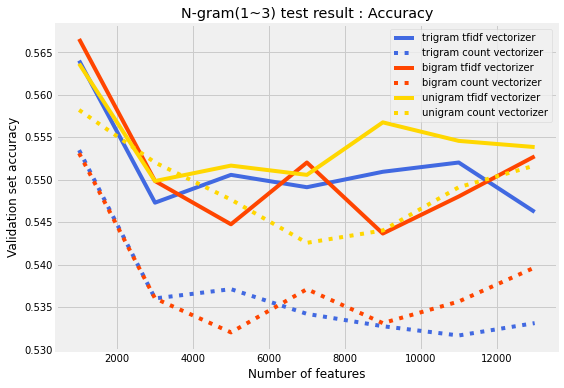

In [101]:
#plotting results cumulative of features from bag of words and TF-IDF approach
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [102]:
#building a ensemble model to evaluate if the same can be used to increase prediction accuracy 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [103]:
#creating features for ensemble model consumption using best features acquired from above analysis 
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=1000, stop_words=None, ngram_range=(1, 2), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [104]:
%%time
bigram_result = classifier_comparator(n_features=1000,ngram_range=(1,2))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
null accuracy: 56.51%
accuracy score: 56.66%
model is 0.15% more accurate than null accuracy
train and test time: 2.37s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
null accuracy: 56.51%
accuracy score: 55.17%
model is 1.35% less accurate than null accuracy
train and test time: 2.23s
------------------------------------------------

In [110]:
#building a voting classifier to improve upon prediction accuracy 

from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('mnb', clf2), ('bnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Multinomial NB', 'Bernoulli NB', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=1000,ngram_range=(1, 2))),
            ('classifier', clf)
        ])
    print ("Validation result for {}".format(label))
    print (clf)
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
null accuracy: 56.51%
accuracy score: 56.66%
model is 0.15% more accurate than null accuracy
train and test time: 2.40s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 56.51%
accuracy score: 57.24%
model is 0.73% more accurate than null accuracy
train and test time: 1.92s
--------------------------------------------------------------------------------
Validation result for Bernoulli NB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
null accuracy: 56.51%
accura

In [111]:
#despite building an ensemble model to improve upon accuracy, we were not able to gain more than 0.98% comparing to null accuracy of the validation dataset. hence we forward with building neurals networks for prediction of fluctuations in bitcoin price. 

In [112]:
#importing libraries required for creating embedding weights 
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

In [114]:
#function to label tweets with unique ids using gensim labeled sentence function
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

In [115]:
#using word to vec approach to create embedding weights for neural netwroks 
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'indicator_360min')

In [116]:
#creating a word2vec model using continuous bag of words approach 
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'indicator_360min')

In [118]:
cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 27480/27480 [00:00<00:00, 1729713.72it/s]


In [119]:
%%time
for epoch in range(30):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha

100%|██████████| 27480/27480 [00:00<00:00, 1902787.89it/s]


CPU times: user 44.5 s, sys: 231 ms, total: 44.7 s
Wall time: 24.8 s


In [120]:
#creating a word2vec model using skipgrams 
model_ug_sg = Word2Vec(sg=1, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 27480/27480 [00:00<00:00, 1537161.90it/s]


In [121]:
%%time
for epoch in range(30):
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha

100%|██████████| 27480/27480 [00:00<00:00, 1824101.06it/s]


CPU times: user 1min 22s, sys: 159 ms, total: 1min 22s
Wall time: 44.1 s


In [122]:
#saving word2vec models created 
model_ug_cbow.save('w2v_model_ug_cbow.word2vec')
model_ug_sg.save('w2v_model_ug_sg.word2vec')

In [123]:
#loading models saved from directory
from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('w2v_model_ug_cbow.word2vec')
model_ug_sg = KeyedVectors.load('w2v_model_ug_sg.word2vec')

In [124]:
#exploring unique keys created by word2vec model using continuous bag of words approach 
len(model_ug_cbow.wv.vocab.keys())

9430

In [125]:
#creating dictionary from word2vec models built using continuous bag of words approach and skipgram 
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Found %s word vectors.' % len(embeddings_index))

Found 9430 word vectors.


In [133]:
#tokenizing tweets to be fed into neural network models 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [134]:
len(tokenizer.word_index)

15189

In [135]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [136]:
mean(length)

22.483578966521105

In [137]:
#padding train sequence 
x_train_seq = pad_sequences(sequences, maxlen=45)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (21984, 45)


In [138]:
#padding validation sequence 
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=45)

In [139]:
#creation of embedding matrix
num_words = 5000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [140]:
#imporitng libraraies required to build deep neural networks 
seed = 42

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [143]:
#building neural networks without embedding matrix 
model_ptw2v = Sequential()
e = Embedding(5000, 200, input_length=45)
model_ptw2v.add(e)
model_ptw2v.add(Flatten())
model_ptw2v.add(Dense(256, activation='relu'))
model_ptw2v.add(Dense(1, activation='sigmoid'))
model_ptw2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ptw2v.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=10, batch_size=32, verbose=2)

Epoch 1/10
687/687 - 21s - loss: 0.6895 - accuracy: 0.5485 - val_loss: 0.6849 - val_accuracy: 0.5659
Epoch 2/10
687/687 - 21s - loss: 0.5678 - accuracy: 0.6857 - val_loss: 0.8060 - val_accuracy: 0.5382
Epoch 3/10
687/687 - 21s - loss: 0.2945 - accuracy: 0.8533 - val_loss: 1.2041 - val_accuracy: 0.5204
Epoch 4/10
687/687 - 21s - loss: 0.1776 - accuracy: 0.9120 - val_loss: 1.9656 - val_accuracy: 0.5335
Epoch 5/10
687/687 - 21s - loss: 0.1367 - accuracy: 0.9303 - val_loss: 2.3435 - val_accuracy: 0.5313
Epoch 6/10
687/687 - 21s - loss: 0.1221 - accuracy: 0.9384 - val_loss: 2.7007 - val_accuracy: 0.5247
Epoch 7/10
687/687 - 21s - loss: 0.1074 - accuracy: 0.9461 - val_loss: 2.8855 - val_accuracy: 0.5091
Epoch 8/10
687/687 - 21s - loss: 0.0963 - accuracy: 0.9509 - val_loss: 3.3818 - val_accuracy: 0.5302
Epoch 9/10
687/687 - 21s - loss: 0.0893 - accuracy: 0.9519 - val_loss: 3.3898 - val_accuracy: 0.5211
Epoch 10/10
687/687 - 21s - loss: 0.0828 - accuracy: 0.9571 - val_loss: 3.8244 - val_accura

In [144]:
#we observe that the validation accuracy to neural network model built is less than accuracy delivered by logistic regression model. 

In [145]:
#building neural networks with embedding matrix 
model_ptw2v = Sequential()
e = Embedding(5000, 200, weights=[embedding_matrix], input_length=45, trainable=False)
model_ptw2v.add(e)
model_ptw2v.add(Flatten())
model_ptw2v.add(Dense(256, activation='relu'))
model_ptw2v.add(Dense(1, activation='sigmoid'))
model_ptw2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ptw2v.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=10, batch_size=32, verbose=2)

Epoch 1/10
687/687 - 11s - loss: 0.6970 - accuracy: 0.5363 - val_loss: 0.6850 - val_accuracy: 0.5408
Epoch 2/10
687/687 - 10s - loss: 0.6227 - accuracy: 0.6471 - val_loss: 0.7192 - val_accuracy: 0.5433
Epoch 3/10
687/687 - 10s - loss: 0.3465 - accuracy: 0.8519 - val_loss: 0.8859 - val_accuracy: 0.5353
Epoch 4/10
687/687 - 10s - loss: 0.1450 - accuracy: 0.9430 - val_loss: 1.1581 - val_accuracy: 0.5360
Epoch 5/10
687/687 - 10s - loss: 0.1052 - accuracy: 0.9597 - val_loss: 1.2449 - val_accuracy: 0.5291
Epoch 6/10
687/687 - 10s - loss: 0.0910 - accuracy: 0.9625 - val_loss: 1.4079 - val_accuracy: 0.5364
Epoch 7/10
687/687 - 10s - loss: 0.0869 - accuracy: 0.9638 - val_loss: 1.4607 - val_accuracy: 0.5397
Epoch 8/10
687/687 - 10s - loss: 0.0944 - accuracy: 0.9647 - val_loss: 1.4665 - val_accuracy: 0.5353
Epoch 9/10
687/687 - 10s - loss: 0.0937 - accuracy: 0.9647 - val_loss: 1.6041 - val_accuracy: 0.5357
Epoch 10/10
687/687 - 10s - loss: 0.1208 - accuracy: 0.9590 - val_loss: 1.5022 - val_accura

In [146]:
#we observe that, despite introducing weights created using embedding matrix the validation accuracy to model is not greater than acuuracy provided by logistic regression model

In [147]:
#importing libraraies to build 
from keras.layers import Conv1D, GlobalMaxPooling1D

In [148]:
#creating convolutional layer for neural network 
structure_test = Sequential()
e = Embedding(5000, 200, input_length=45)
structure_test.add(e)
structure_test.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
structure_test.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 45, 200)           1000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 44, 100)           40100     
Total params: 1,040,100
Trainable params: 1,040,100
Non-trainable params: 0
_________________________________________________________________


In [149]:
#adding pooling layer to network
structure_test = Sequential()
e = Embedding(5000, 200, input_length=45)
structure_test.add(e)
structure_test.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
structure_test.add(GlobalMaxPooling1D())
structure_test.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 45, 200)           1000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 44, 100)           40100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
Total params: 1,040,100
Trainable params: 1,040,100
Non-trainable params: 0
_________________________________________________________________


In [150]:
#creating a convolutional neural network 
model_cnn_01 = Sequential()
e = Embedding(5000, 200, input_length=45)
model_cnn_01.add(e)
model_cnn_01.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_cnn_01.add(GlobalMaxPooling1D())
model_cnn_01.add(Dense(128, activation='relu'))
model_cnn_01.add(Dense(1, activation='sigmoid'))
model_cnn_01.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_01.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=64, verbose=2)

Epoch 1/5
344/344 - 11s - loss: 0.6865 - accuracy: 0.5535 - val_loss: 0.6801 - val_accuracy: 0.5659
Epoch 2/5
344/344 - 10s - loss: 0.6486 - accuracy: 0.6228 - val_loss: 0.6939 - val_accuracy: 0.5600
Epoch 3/5
344/344 - 10s - loss: 0.5071 - accuracy: 0.7522 - val_loss: 0.8254 - val_accuracy: 0.5575
Epoch 4/5
344/344 - 11s - loss: 0.2928 - accuracy: 0.8762 - val_loss: 1.0483 - val_accuracy: 0.5528
Epoch 5/5
344/344 - 10s - loss: 0.1615 - accuracy: 0.9351 - val_loss: 1.2974 - val_accuracy: 0.5462


In [151]:
#we observe the validation accuracy is less than that of logistic regression model. hence we move forward building a cnn using weights as embedding matrix 

In [152]:
model_cnn_02 = Sequential()
e = Embedding(5000, 200, weights=[embedding_matrix], input_length=45, trainable=True)
model_cnn_02.add(e)
model_cnn_02.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_cnn_02.add(GlobalMaxPooling1D())
model_cnn_02.add(Dense(256, activation='relu'))
model_cnn_02.add(Dense(1, activation='sigmoid'))
model_cnn_02.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_02.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=10, batch_size=64, verbose=2)

Epoch 1/10
344/344 - 11s - loss: 0.6988 - accuracy: 0.5358 - val_loss: 0.6838 - val_accuracy: 0.5622
Epoch 2/10
344/344 - 10s - loss: 0.6633 - accuracy: 0.6003 - val_loss: 0.7195 - val_accuracy: 0.5666
Epoch 3/10
344/344 - 10s - loss: 0.6042 - accuracy: 0.6719 - val_loss: 0.7773 - val_accuracy: 0.5007
Epoch 4/10
344/344 - 10s - loss: 0.5066 - accuracy: 0.7505 - val_loss: 0.8552 - val_accuracy: 0.5306
Epoch 5/10
344/344 - 11s - loss: 0.3745 - accuracy: 0.8279 - val_loss: 0.9811 - val_accuracy: 0.5397
Epoch 6/10
344/344 - 11s - loss: 0.2627 - accuracy: 0.8873 - val_loss: 1.2927 - val_accuracy: 0.5193
Epoch 7/10
344/344 - 10s - loss: 0.1839 - accuracy: 0.9239 - val_loss: 1.5139 - val_accuracy: 0.5251
Epoch 8/10
344/344 - 11s - loss: 0.1395 - accuracy: 0.9418 - val_loss: 1.7079 - val_accuracy: 0.5273
Epoch 9/10
344/344 - 11s - loss: 0.1242 - accuracy: 0.9497 - val_loss: 1.8728 - val_accuracy: 0.5451
Epoch 10/10
344/344 - 11s - loss: 0.1091 - accuracy: 0.9551 - val_loss: 2.0433 - val_accura

In [153]:
#since we do not observe significant increase in validation accuracy, we move forward building a more eloborate convolutional neural network consisting to mutiple layers and varying kernal size indicative to uni, bi, tri and quad grams  

In [154]:
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import Model

tweet_input = Input(shape=(45,), dtype='int32')

tweet_encoder = Embedding(5000, 200, weights=[embedding_matrix], input_length=45, trainable=True)(tweet_input)
unigram_branch = Conv1D(filters=100, kernel_size=1, padding='valid', activation='relu', strides=1)(tweet_encoder)
unigram_branch = GlobalMaxPooling1D()(unigram_branch)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
merged = concatenate([unigram_branch,bigram_branch, trigram_branch, fourgram_branch], axis=1)

merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.3)(merged)
merged = Dense(1)(merged)
output = Activation('sigmoid')(merged)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 45, 200)      1000000     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 45, 100)      20100       embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 44, 100)      40100       embedding_8[0][0]                
______________________________________________________________________________________________

In [155]:
model.fit(x_train_seq, y_train, batch_size=64, epochs=4,validation_data=(x_val_seq, y_validation))

Epoch 1/4
344/344 [==============================] - 39s 110ms/step - loss: 0.7084 - accuracy: 0.5380 - val_loss: 0.6823 - val_accuracy: 0.5666
Epoch 2/4
344/344 [==============================] - 38s 109ms/step - loss: 0.6780 - accuracy: 0.5675 - val_loss: 0.6866 - val_accuracy: 0.5404
Epoch 3/4
344/344 [==============================] - 38s 110ms/step - loss: 0.6496 - accuracy: 0.6199 - val_loss: 0.6957 - val_accuracy: 0.5568
Epoch 4/4
344/344 [==============================] - 38s 110ms/step - loss: 0.5786 - accuracy: 0.6954 - val_loss: 0.7501 - val_accuracy: 0.5455


In [156]:
#final evaluation of models 

In [157]:
#creating a logistic regression model with best features identified for TF-IDF vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(max_features=1000,ngram_range=(1, 2))
tvec.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [158]:
x_train_tfidf = tvec.transform(x_train)
x_test_tfidf = tvec.transform(x_test)

In [159]:
lr_with_tfidf = LogisticRegression()
lr_with_tfidf.fit(x_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
lr_with_tfidf.score(x_test_tfidf,y_test)

0.5556768558951966

In [162]:
yhat_lr = lr_with_tfidf.predict_proba(x_test_tfidf)

In [163]:
sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=45)

In [164]:
model.evaluate(x=x_test_seq, y=y_test)

86/86 [==============================] - 1s 14ms/step - loss: 0.7603 - accuracy: 0.5262


[0.7603141665458679, 0.5262008905410767]

In [165]:
yhat_cnn = model.predict(x_test_seq)

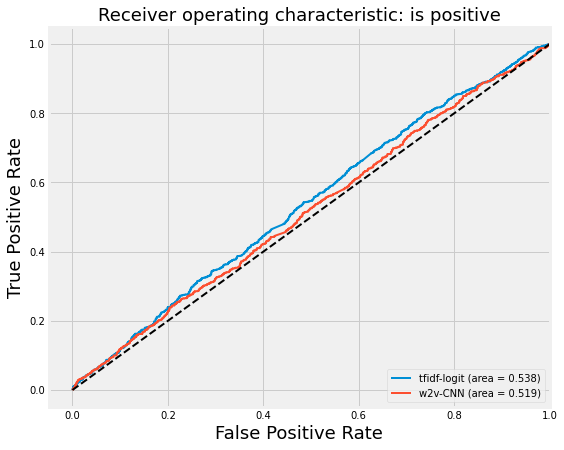

In [166]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, yhat_lr[:,1])
roc_auc = auc(fpr, tpr)
fpr_cnn, tpr_cnn, threshold = roc_curve(y_test, yhat_cnn)
roc_auc_nn = auc(fpr_cnn, tpr_cnn)
plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, label='tfidf-logit (area = %0.3f)' % roc_auc, linewidth=2)
plt.plot(fpr_cnn, tpr_cnn, label='w2v-CNN (area = %0.3f)' % roc_auc_nn, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is positive', fontsize=18)
plt.legend(loc="lower right")
plt.show()